In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from scipy.stats import skew
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading data
data = pd.read_csv('../Part C/data2/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['BusinessTravel'] = data['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

features = [
    'BusinessTravel', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'OverTime',
    'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'Age', 'PercentSalaryHike'
]

X = data[features]
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


numeric_features = ['DistanceFromHome', 'HourlyRate', 'TotalWorkingYears', 'TrainingTimesLastYear', 'Age', 'PercentSalaryHike']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.860544   0.666667  0.255319  0.369231  0.798949
1        Decision Tree  0.772109   0.321429  0.382979  0.349515  0.614566
2        Random Forest  0.836735   0.461538  0.127660  0.200000  0.773796
3                 k-NN  0.843537   0.555556  0.106383  0.178571  0.650185
4                  SVM  0.840136   0.000000  0.000000  0.000000  0.784219


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "Decision Tree": {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [5, 8, None],
        'max_features': ['sqrt', 'log2']
    },
    "k-NN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [11]:
best_models = {}
results = []

for name, model in models.items():
    print(f"Tuning {name}...")
    clf = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    clf.fit(X_train, y_train)
    
    best_model = clf.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:,1] if hasattr(best_model, "predict_proba") else None

    results.append({
        "Model": name,
        "Best Params": clf.best_params_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })

Tuning Logistic Regression...
Tuning Decision Tree...
Tuning Random Forest...
Tuning k-NN...
Tuning SVM...


In [12]:
results_df = pd.DataFrame(results)
results_df.sort_values("F1 Score", ascending=False, inplace=True)
display(results_df)

,Model,Best Params,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.863946,0.684211,0.276596,0.393939,0.799208
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.799320,0.363636,0.340426,0.351648,0.648893
4,SVM,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.816327,0.393939,0.276596,0.325000,0.708588
2,Random Forest,"{'max_depth': None, 'max_features': 'sqrt', 'n...",0.836735,0.461538,0.127660,0.200000,0.773796
3,k-NN,"{'n_neighbors': 3, 'weights': 'uniform'}",0.812925,0.300000,0.127660,0.179104,0.628392


<Figure size 640x480 with 0 Axes>

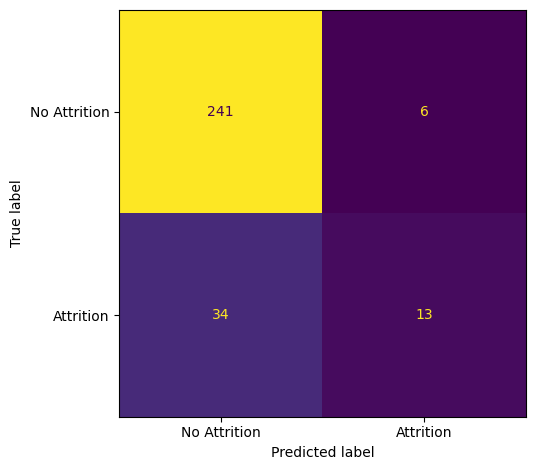

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ("No Attrition", "Attrition") 

lr_best = best_models["Logistic Regression"]
y_pred_lr = lr_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(values_format="d", cmap=None, colorbar=False)
plt.tight_layout()
plt.show()


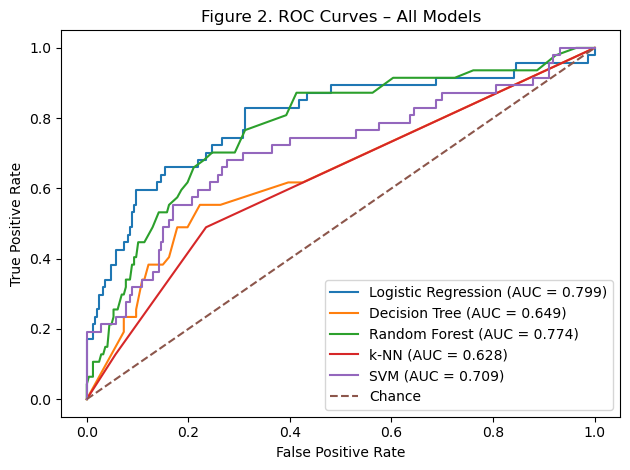

In [45]:
from sklearn.metrics import roc_curve, auc

def _scores_for_roc(fitted_model, X):
    if hasattr(fitted_model, "predict_proba"):
        return fitted_model.predict_proba(X)[:, 1]
    if hasattr(fitted_model, "decision_function"):
        return fitted_model.decision_function(X)
    return fitted_model.predict(X)

plt.figure()
for name, mdl in best_models.items():
    scores = _scores_for_roc(mdl, X_test)
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 2. ROC Curves – All Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [31]:
!pip install shap


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -------------------------- ------------ 368.6/545.3 kB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 8.5 MB/s eta 0:00:00
